In [241]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [242]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from   sklearn    import datasets

In [243]:
# Wiedrholbarer Zufall
np.random.seed(42)

In [244]:
def logistic(x):
    z = (1/(1+np.exp(-x)))
    return z
    
    
def Neuron(x, w, b):
    z = w[0] * x[0] + w[1] * x[1] + b
    y = logistic(z)
    return y

In [245]:
# Iris-Datensatz laden ...

iris = datasets.load_iris()

# Länge und Breite des Blütenblattes laden
# und die ersten 5 Werte ausgeben
x    = iris["data"][:, (2,3)]  
print('x = \n',x[0:5])
print()

# Typklasse der Lilienart festlegen
# "Iris virginica" --> 1, 
# "Iris setosa un Iris versicolor" --> 0
t    = (iris["target"]==2).astype(np.int) 
print('t = \n',t)
print()

# Anzahl der Datensätze
n = np.size(t)

print('x.shape =', x.shape)
print('t.shape =', t.shape)
print()
print('Anzahl der Datensätze  =', n)



x = 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

t = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

x.shape = (150, 2)
t.shape = (150,)

Anzahl der Datensätze  = 150


In [246]:
# Standardisierung der Daten

# Hier geht es los .........
x_stand = (x - np.mean(x)) / np.var(x)
print('x.shape =', x.shape)
print('x.shape =', x_stand.shape)
mean = np.mean(x)
std = np.std(x)

x.shape = (150, 2)
x.shape = (150, 2)


In [247]:
print("Mittelwert   x = ", np.mean(x_stand, axis=0))
print("Standardabw. x = ", np.var(x_stand, axis=0))

Mittelwert   x =  [ 0.36836426 -0.36836426]
Standardabw. x =  [0.25663668 0.04784795]


In [248]:
# Minimum und Maximum der Daten finden
# (um später die Datenpunkte gut darstellen zu können)

# Hier geht es los .........
Min = np.min(x_stand[:, :])
print('Min =', Min)
Max = np.max(x_stand[:, :])
print('Max =', Max)


    

Min = -0.6849003029839235
Max = 1.2730545990441084


In [249]:
# A)
# Parameter und Variablen anlegen
# und initialisieren
eta    = 0.1
epochs = 15000

# Fehlervektor anlegen
E = np.zeros(epochs)

# Gewichte und Bias anlegen und initialisieren
w = 1*(np.random.rand(2)-0.5)
b = 0
print('w.shape =', w.shape)
print('E.shape =', E.shape)

# Training des Neurons A)
for i in range(0,epochs):
    # Zufallsindex erzeugen
    # Hier geht es los .........
    idx = np.int(np.floor(n*np.random.rand(1,1)))
    # Forward
    # Hier geht es los .........
    yc = Neuron(x_stand[idx], w, b)
    tc = t[idx]
    # Backprop von w und b mit quad. Fehler
    # Hier geht es los .........
    sensitivity = (yc-tc) * yc * (1-yc)
    w = w - eta  * sensitivity* x_stand[idx]
    b = b - eta * sensitivity
    # Backprop mit Crossentropy
    # Hier geht es los .........
    
    # Berechnung des aktuellen Fehlers E[i]
    # Hier geht es los .........
    E[i] = 0.5 * (tc -yc)**2


w.shape = (2,)
E.shape = (15000,)


In [250]:
# B)
# Parameter und Variablen anlegen
# und initialisieren
eta    = 0.1
epochs = 15000

# Fehlervektor anlegen
b_E = np.zeros(epochs)

# Gewichte und Bias anlegen und initialisieren
w_b = 1*(np.random.rand(2)-0.5)
b_b = 0
print('w.shape =', w_b.shape)
print('E.shape =', E.shape)
# Training des Neurons B)
epochs = 15000

##Mittelwertbefreiung der spalten
b_x = x_stand
spalte = 0

for column in b_x.T:
    column = column - np.mean(column)
    #standartabweichung=1 setzen
    column = column / np.std(column)
    #print(new_x[:,spalte] - column)
    #asign back
    b_x[:,spalte] = column.T
    spalte += 1


for i in range(0,epochs):
    # Zufallsindex erzeugen
    # Hier geht es los .........
    idx = np.int(np.floor(n*np.random.rand(1,1)))
    # Forward
    # Hier geht es los .........
    #mittelwertbefreiung der spalte

    yc = Neuron(b_x[idx], w_b, b)
    tc = t[idx]
    # Backprop von w und b mit quad. Fehler
    # Hier geht es los .........
    sensitivity = (yc-tc) * yc * (1-yc)
    w_b = w_b - eta  * sensitivity* b_x[idx]
    b_b= b_b - eta * sensitivity
    # Backprop mit Crossentropy
    # Hier geht es los .........
    
    # Berechnung des aktuellen Fehlers E[i]
    # Hier geht es los .........
    b_E[i] = 0.5 * (tc -yc)**2

w.shape = (2,)
E.shape = (15000,)


In [251]:
# C)
# Parameter und Variablen anlegen
# und initialisieren
eta    = 0.1
epochs_c = 15000

# Fehlervektor anlegen
c_E = np.zeros(epochs_c)

# Gewichte und Bias anlegen und initialisieren
w_c = 1*(np.random.rand(2)-0.5)
b_c = 0
print('w.shape =', w_c.shape)
print('E.shape =', c_E.shape)

# Training des Neurons C)

##Mittelwertbefreiung der spalten
c_x = x_stand

spalte = 0

for column in c_x.T:
    column = column - np.mean(column)
    #standartabweichung=1 setzen
    column = column / np.std(column)
    #print(new_x[:,spalte] - column)
    #asign back
    c_x[:,spalte] = column.T
    spalte += 1


for i in range(0,epochs_c):
    # Zufallsindex erzeugen
    # Hier geht es los .........
    idx = np.int(np.floor(n*np.random.rand(1,1)))
    # Forward
    # Hier geht es los .........
    #mittelwertbefreiung der spalte

    yc = Neuron(c_x[idx], w_c, b_c)
    tc = t[idx]
    # Backprop mit Crossentropy
    sensitivity = (1-tc)* yc - tc *(1-yc)
    w_c = w_c - eta  * sensitivity* c_x[idx]
    b_c = b_c - eta * sensitivity
    # Berechnung des aktuellen Fehlers E[i]
    c_E[i] = - ( tc * np.log(yc) + (1-tc) * np.log(1-yc) )

w.shape = (2,)
E.shape = (15000,)


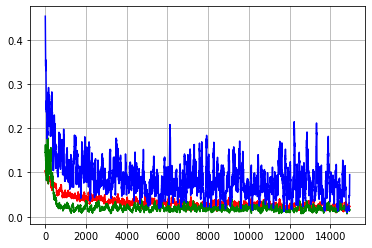

In [252]:
# Glättung der Fehlerwerte über 50 Werte
# Hier geht es los .........
masksize = 50
kernel   = np.ones(masksize)/masksize
E_glatt = np.convolve(E, kernel, mode='valid')
# Plotten des Fehlerverlaufs
# Hier geht es los .........
xLine = np.size(E_glatt)
xgrid = np.linspace(0, xLine, xLine)
plt.plot(xgrid, E_glatt, 'red')
plt.grid()

# Glättung der Fehlerwerte über 50 Werte
# Hier geht es los .........
masksize = 50
kernel   = np.ones(masksize)/masksize
E_glatt = np.convolve(b_E, kernel, mode='valid')
# Plotten des Fehlerverlaufs
# Hier geht es los .........
xLine = np.size(E_glatt)
xgrid = np.linspace(0, xLine, xLine)
plt.plot(xgrid, E_glatt, 'green')
plt.grid()


# Glättung der Fehlerwerte über 50 Werte
# Hier geht es los .........
masksize = 50
kernel   = np.ones(masksize)/masksize
E_glatt = np.convolve(c_E, kernel, mode='valid')
# Plotten des Fehlerverlaufs
# Hier geht es los .........
xLine = np.size(E_glatt)
xgrid = np.linspace(0, xLine, xLine)
plt.plot(xgrid, E_glatt, 'blue')
plt.grid()

# Beispiel:
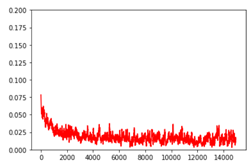

In [267]:
# Erzeugen der x- und y-Werte eines zweidimensionalen
# Gitters für die Darstellung des Eingangsvektorraumes
# im Bereich xmin bis xmax mit 100 Zwischenpositionen

# Hier geht es los .........)
xgrid = np.linspace(Min, Max, 100)
ygrid = np.linspace(Min, Max, 100)
XGrid, YGrid = np.meshgrid(xgrid, ygrid)

print('xgrid.shape =', xgrid.shape)
print('XGrid.shape =', XGrid.shape)

print()
print('XGrid =',XGrid)
print()
print('YGrid =',YGrid)
# Berechnung der Neuron

# Berechnung der Neuronen-Ausgabewerte Z für
# alle Gitterpunkte
Gitterpunkte = np.array([XGrid, YGrid])
#Z = Neuron(Gitterpunkte, w, b) #Aufgabe A
#Z = Neuron(Gitterpunkte, w_b, b_b) #Aufgabe B
Z = Neuron(Gitterpunkte, w_c, b_c) #Aufgabe C
# Hier geht es los .........



print('Z.shape     =', Z.shape) # Anm.: (100,100)

xgrid.shape = (100,)
XGrid.shape = (100, 100)

XGrid = [[-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]
 [-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]
 [-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]
 ...
 [-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]
 [-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]
 [-0.6849003  -0.66512298 -0.64534566 ...  1.23349995  1.25327728
   1.2730546 ]]

YGrid = [[-0.6849003  -0.6849003  -0.6849003  ... -0.6849003  -0.6849003
  -0.6849003 ]
 [-0.66512298 -0.66512298 -0.66512298 ... -0.66512298 -0.66512298
  -0.66512298]
 [-0.64534566 -0.64534566 -0.64534566 ... -0.64534566 -0.64534566
  -0.64534566]
 ...
 [ 1.23349995  1.23349995  1.23349995 ...  1.23349995  1.23349995
   1.23349995]
 [ 1.25327728  1.25327728  1.25327728 ...  1.25327728  1.25327728
   1.25327728]
 [ 1.2730546   1.2730546   1.273054

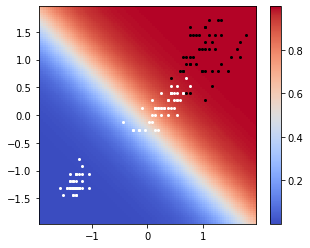

In [268]:
# Darstellung des Eingangsvektorraumes (cmap='coolwarm') ....
scaling = abs(Min) + abs(Max)
# Hier geht es los .........
fig = plt.figure(1, figsize=(5, 4))
plt.imshow(Z, origin='lower', extent=[-scaling, scaling, -scaling, scaling], cmap='coolwarm')
cb = plt.colorbar()
# ... und Einzeichnen der Datenpunkte 
# ("iris virginica" --> schwarz, "alle anderen" --> weiss)

# Hier geht es los .........
for i in range(0, n - 1):
    if(t[i] == 0):
        plt.plot(x_stand[i,0], x_stand[i,1], 'o', c='white', markersize=2)
    else:
        plt.plot(x_stand[i,0], x_stand[i,1], 'o', c='black', markersize=2)

# Beispiel:
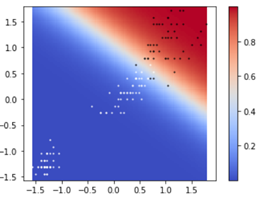